In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# import dataset, 28x28 pictures of handwritten digits
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train and so on are multi-dimensional arrays

In [3]:
# want to normalize 0-255 to 0-1
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

In [4]:
# to view the data
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [17]:
# build the model

# input layer
model = keras.models.Sequential() # sequential is most common, feed forward
model.add(keras.layers.Flatten(input_shape = x_train[0].shape)) # flatten a 28x28 matrix to a single layer
# can use get shape in flatten command to make it more flexible


# 2 hidden layers
model.add(keras.layers.Dense(128, activation=tf.nn.relu)) # args, number of neurons, activation function
model.add(keras.layers.Dense(128, activation=tf.nn.relu)) # args, number of neurons, activation function

# output layer, note output layer must have softmax activation layer (as softmax gives a probability)
model.add(keras.layers.Dense(10, activation=tf.nn.softmax)) # args, number of neurons, activation function



In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 3s 51us/step - loss: 0.2624 - acc: 0.9238
Epoch 2/3
60000/60000 [==============================] - 3s 49us/step - loss: 0.1068 - acc: 0.9666
Epoch 3/3
60000/60000 [==============================] - 3s 47us/step - loss: 0.0724 - acc: 0.9772


In [19]:
val_loss, val_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 29us/step


In [20]:
# check that "out of training set" data has a good loss and accuracy
print(val_loss, val_acc)

0.09550920280516148 0.9708


In [15]:
# save a model
model.save('epic_number_reader.model')

# load a model
new_model = keras.models.load_model('epic_number_reader.model')

In [23]:
# predictions takes in a LIST!, not a single input
predictions = new_model.predict([x_test])

In [29]:
# just printing predictions gives us probability distribution
print(predictions)

[[4.5961004e-10 9.3527987e-08 5.3457447e-06 ... 9.9998486e-01
  1.5207862e-08 5.4726353e-08]
 [2.5480522e-09 5.6224396e-03 9.9371284e-01 ... 2.3823370e-09
  1.2460705e-06 3.3189538e-09]
 [4.3377892e-09 9.9986684e-01 1.2065054e-06 ... 4.2876338e-05
  4.9528629e-05 7.7863234e-07]
 ...
 [1.2025678e-09 2.4488568e-06 1.7089005e-07 ... 4.5392539e-05
  1.1408402e-05 2.1221448e-04]
 [3.8424554e-07 1.3688883e-06 5.5251288e-08 ... 2.6455089e-07
  1.5595241e-04 1.5349311e-08]
 [1.1511719e-06 8.4327058e-07 4.0927257e-06 ... 7.3411215e-09
  4.8707165e-07 5.8557138e-08]]


In [32]:
# you could do predictions and let keras handle the mapping between labels and output arrays
predictions_2 = new_model.predict_classes(x_test, verbose=1)

10000/10000 [==============================] - 0s 16us/step


In [33]:
# handled by keras
print(predictions_2)

[7 2 1 ... 4 5 6]


7


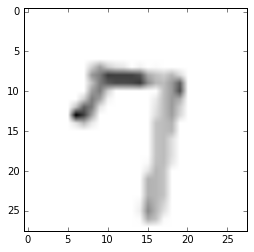

7


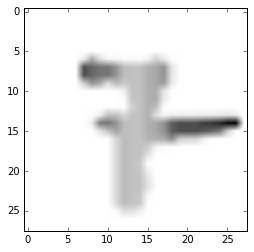

9


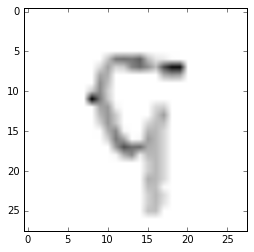

3


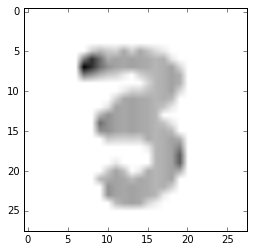

9


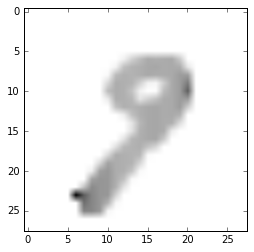

9


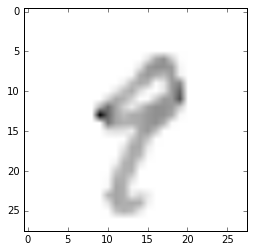

6


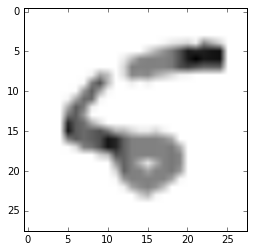

7


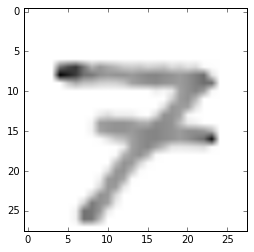

4


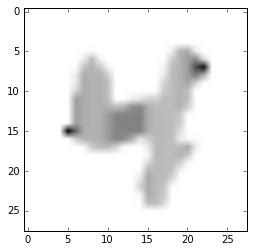

8


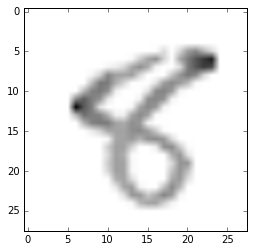

In [52]:
# testing random mappings
import random
rand_list = random.sample(range(100),10)

for i in rand_list:
    print(predictions_2[i])
    plt.imshow(x_test[i], cmap = plt.cm.binary)
    plt.show()